# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}

\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}

\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

import ainvert


In [2]:
def show_img_with_hist(img, title):
  _, ax = plt.subplots(1, 2,figsize=(20, 5), dpi=200)
  ax[0].imshow(img, cmap="gray")
  ax[0].set_title(title)
  ax[1].plot(cv2.calcHist([img], [0], None, [256], [0, 256]))
  ax[1].set_title("histogram")

In [3]:

def bicubic_interpolation(image, scale_x, scale_y):
    A_invert = ainvert.A_invert
    def check_valid_index(index, range):
        return min(max(index, 0), range - 2)
        # if index < 0:
        #     return 0
        # elif index >= range:
        #     return range - 3
        # else:
        #     return index
    def derivatyves_x(x, y, width, height):
        x1 = check_valid_index(x + 1, width)
        x2 = check_valid_index(x - 1, width)
        return (image[x1, y] - image[x2, y]) / 2
    def derivatyves_y(x, y, width, height):
        y1 = check_valid_index(y + 1, height)
        y2 = check_valid_index(y - 1, height)
        return (image[x, y1] - image[x, y2]) / 2
    def derivatyves_xy(x, y, width, height):
        x1 = check_valid_index(x + 1, width)
        y1 = check_valid_index(y + 1, height)
        
        x2 = check_valid_index(x - 1, width)
        y2 = check_valid_index(y - 1, height)
        return (image[x1, y1] - image[x2, y] - image[x, y2] + image[x, y]) / 4   
    width, height = image.shape
    new_width = int(width * scale_x)
    new_height = int(height * scale_y)
    new_image = np.zeros((new_width, new_height), dtype=np.uint8)
    for i in range(new_width):
        x = i / scale_y 
        for j in range(new_height):
            y = j / scale_x

            x1 = int(x)
            x2 = check_valid_index(x1 + 1, width)
            # x3 = check_valid_index(x1 + 2, width)
            # x4 = check_valid_index(x1 + 3, width)
            # y3 = check_valid_index(y1 + 2, height)
            # y4 = check_valid_index(y1 + 3, height)

            y1 = int(y)
            y2 = check_valid_index(y1 + 1, height)  

            A = image[x1, y1]
            B = image[x2, y1]
            C = image[x2, y2]
            D = image[x1, y2]

            Ax = derivatyves_x(x1, y1, width, height)
            Bx = derivatyves_x(x2, y1, width, height)
            Cx = derivatyves_x(x2, y2, width, height)
            Dx = derivatyves_x(x1, y2, width, height)

            Ay = derivatyves_y(x1, y1, width, height)
            By = derivatyves_y(x2, y1, width, height)
            Cy = derivatyves_y(x2, y2, width, height)
            Dy = derivatyves_y(x1, y2, width, height)

            Axy = derivatyves_xy(x1, y1, width, height)
            Bxy = derivatyves_xy(x2, y1, width, height)
            Cxy = derivatyves_xy(x2, y2, width, height)
            Dxy = derivatyves_xy(x1, y2, width, height)
            
            x_vec = np.array([A, B, D, C, Ax, Bx, Dx, Cx, Ay, By, Dy, Cy, Axy, Bxy, Dxy, Cxy]).reshape(-1, 1)

            a_vec = np.dot(A_invert, x_vec).reshape(4, 4)
            for k in range(4):
                for l in range(4):
                    new_image[i, j] += a_vec[k, l] * (x - x1) ** k * (y - y1) ** l
    #rotate image to get the same orientation as original
    # new_image = cv2.rotate(new_image, cv2.ROTATE_90_CLOCKWISE)
    # #mirror image to get the same orientation as original
    # new_image = cv2.flip(new_image, 1)

    return new_image

C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:18: RuntimeWarning: overflow encountered in scalar subtract
  return (image[x, y1] - image[x, y2]) / 2
C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:25: RuntimeWarning: overflow encountered in scalar subtract
  return (image[x1, y1] - image[x2, y] - image[x, y2] + image[x, y]) / 4
C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:25: RuntimeWarning: overflow encountered in scalar add
  return (image[x1, y1] - image[x2, y] - image[x, y2] + image[x, y]) / 4
C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:14: RuntimeWarning: overflow encountered in scalar subtract
  return (image[x1, y] - image[x2, y]) / 2


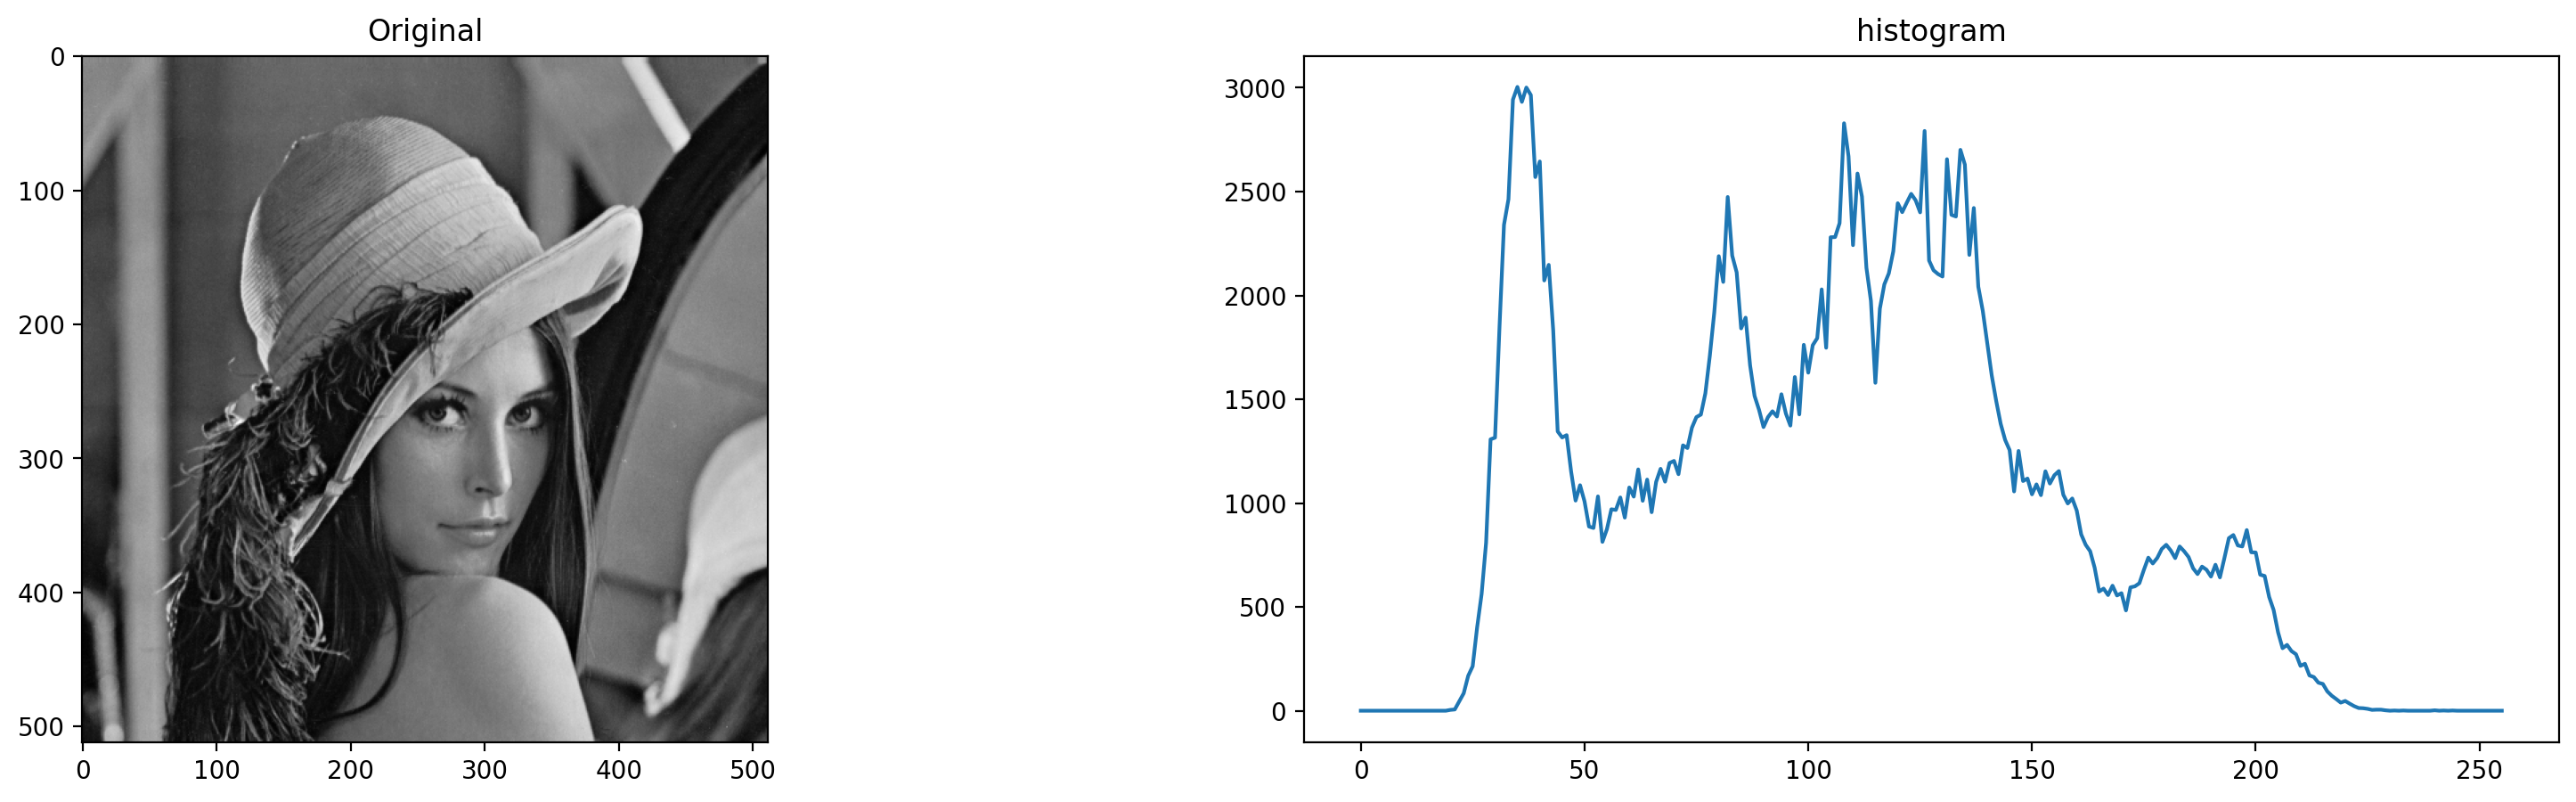

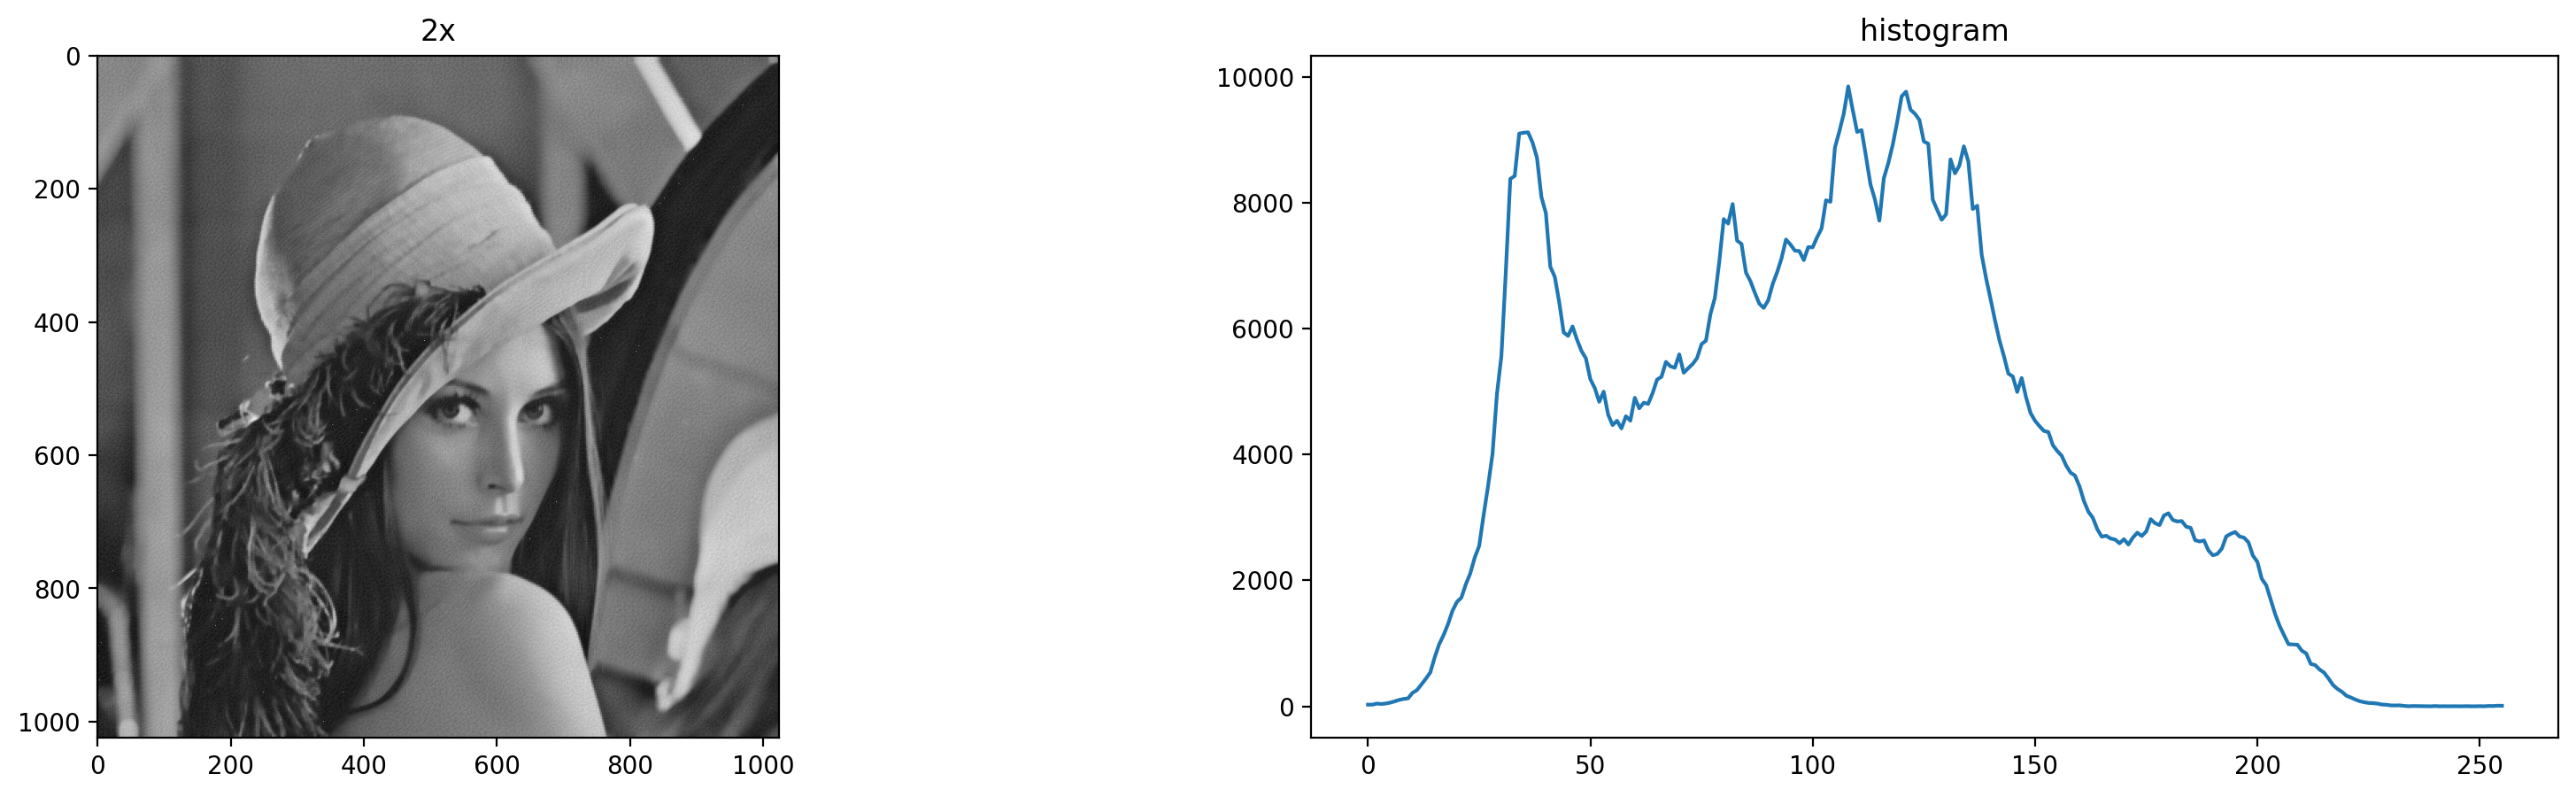

In [4]:
lena = cv2.imread("lena.bmp", cv2.IMREAD_GRAYSCALE)
show_img_with_hist(lena, "Original")

lena_2x = bicubic_interpolation(lena, 2, 2)
show_img_with_hist(lena_2x, "2x")

C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:18: RuntimeWarning: overflow encountered in scalar subtract
  return (image[x, y1] - image[x, y2]) / 2
C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:25: RuntimeWarning: overflow encountered in scalar subtract
  return (image[x1, y1] - image[x2, y] - image[x, y2] + image[x, y]) / 4
C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:25: RuntimeWarning: overflow encountered in scalar add
  return (image[x1, y1] - image[x2, y] - image[x, y2] + image[x, y]) / 4
C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:14: RuntimeWarning: overflow encountered in scalar subtract
  return (image[x1, y] - image[x2, y]) / 2


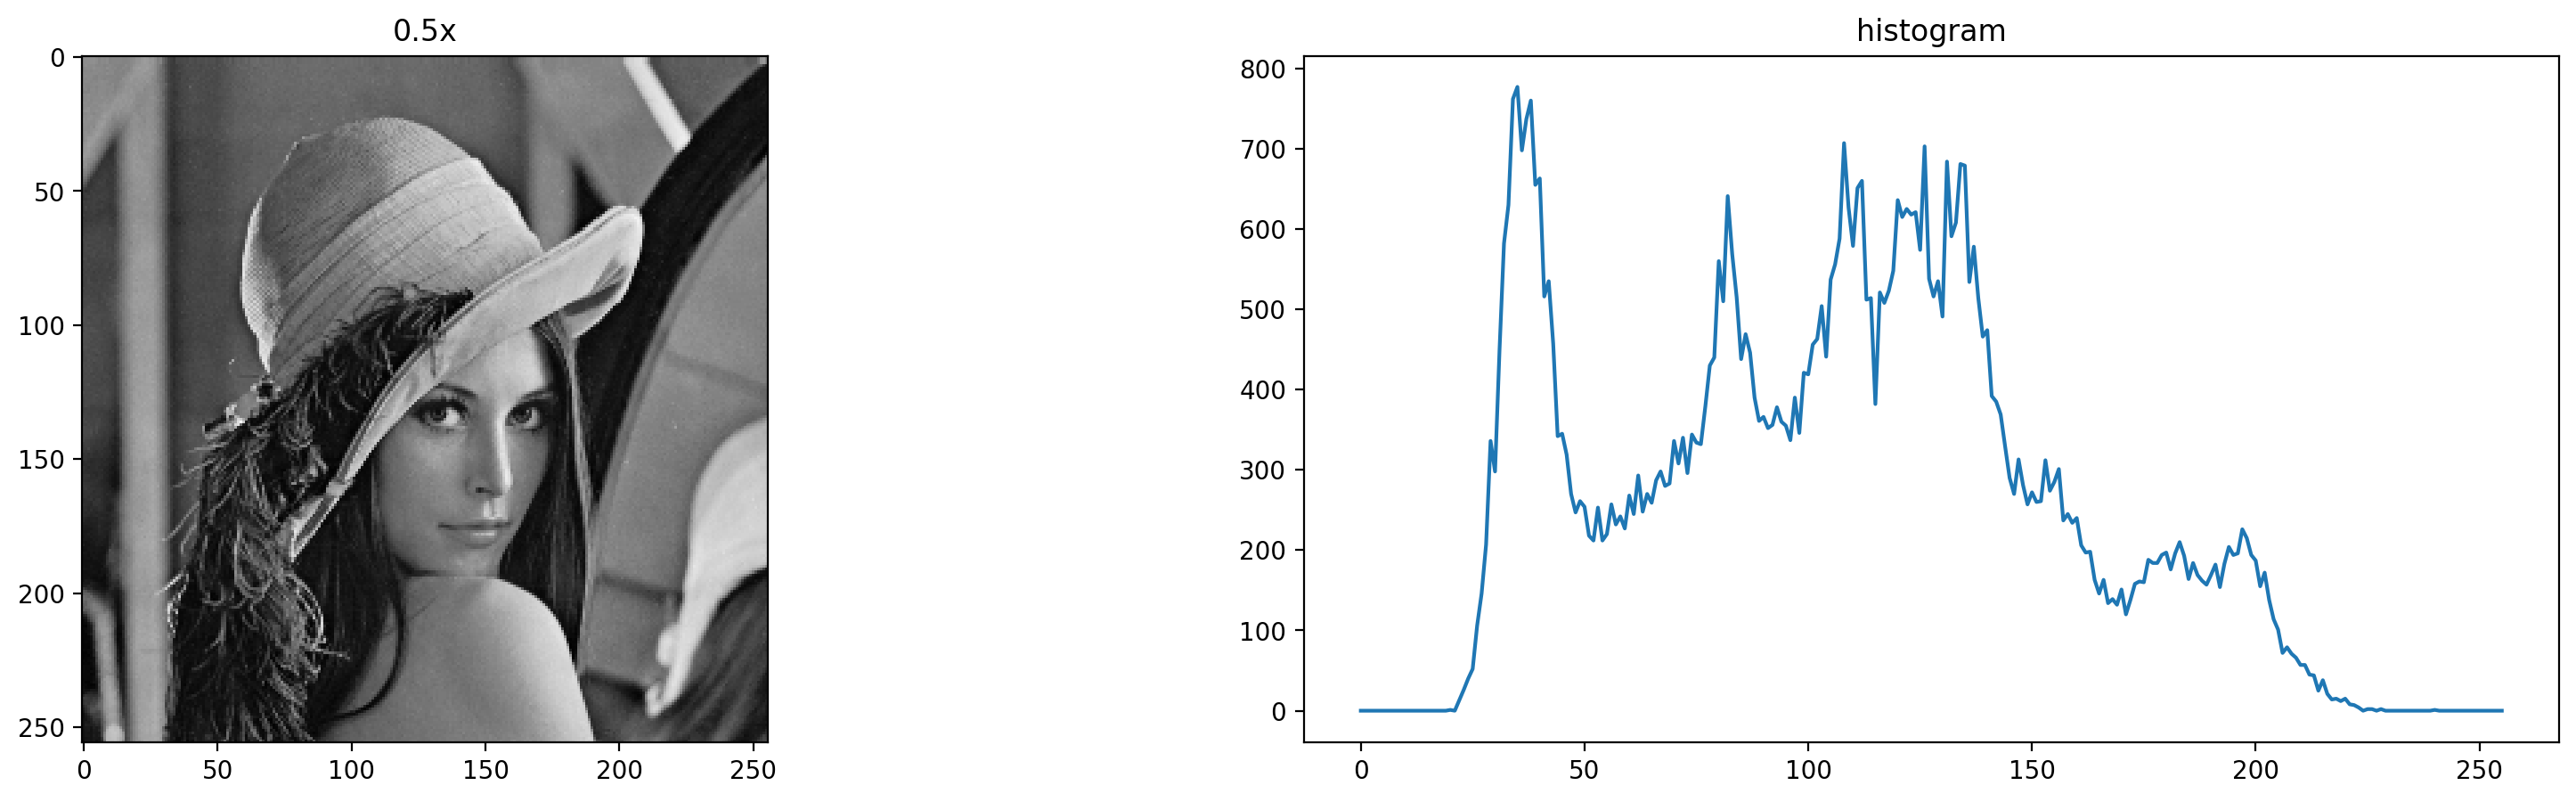

In [5]:
lena_05x = bicubic_interpolation(lena, 0.5, 0.5)
show_img_with_hist(lena_05x, "0.5x")

C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:18: RuntimeWarning: overflow encountered in scalar subtract
  return (image[x, y1] - image[x, y2]) / 2
C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:25: RuntimeWarning: overflow encountered in scalar subtract
  return (image[x1, y1] - image[x2, y] - image[x, y2] + image[x, y]) / 4
C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:25: RuntimeWarning: overflow encountered in scalar add
  return (image[x1, y1] - image[x2, y] - image[x, y2] + image[x, y]) / 4
C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:14: RuntimeWarning: overflow encountered in scalar subtract
  return (image[x1, y] - image[x2, y]) / 2


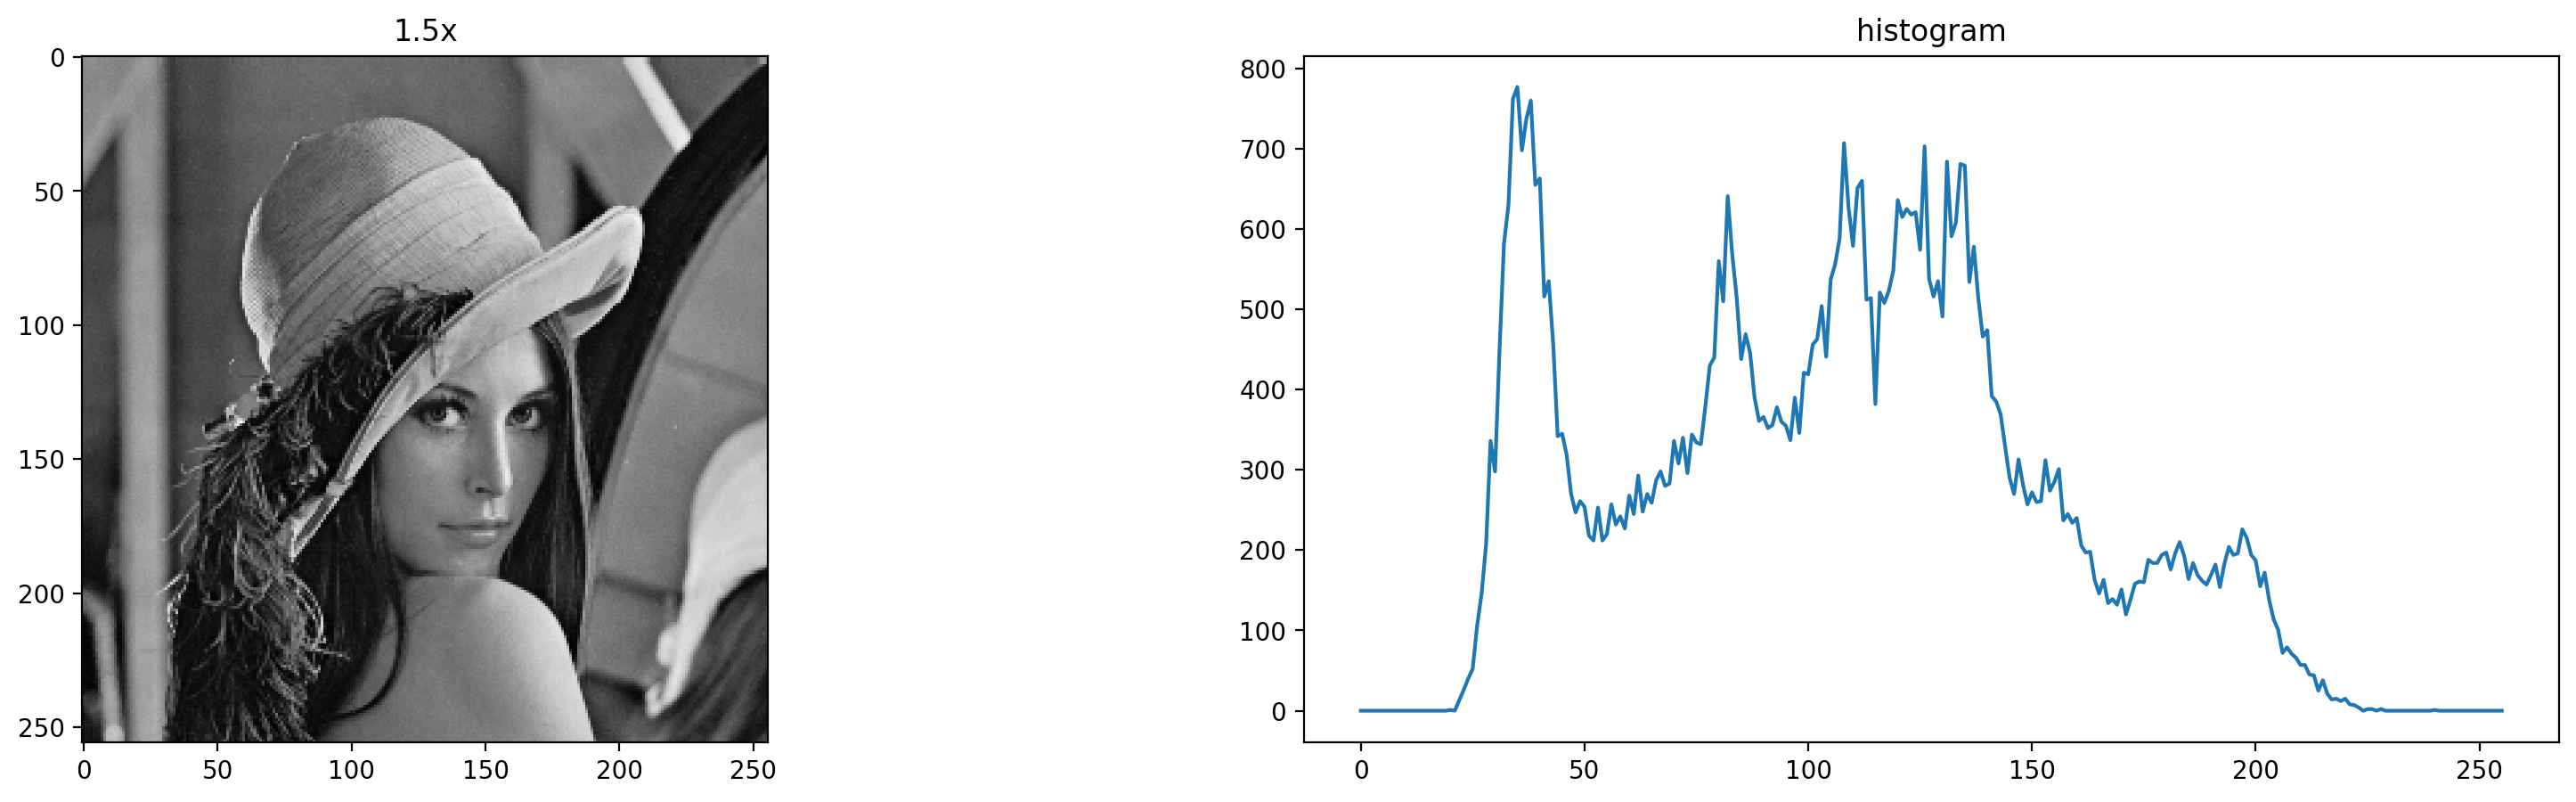

In [6]:
lena_15x = bicubic_interpolation(lena, 1.5, 1.5)
show_img_with_hist(lena_05x, "1.5x")

C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:18: RuntimeWarning: overflow encountered in scalar subtract
  return (image[x, y1] - image[x, y2]) / 2
C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:25: RuntimeWarning: overflow encountered in scalar subtract
  return (image[x1, y1] - image[x2, y] - image[x, y2] + image[x, y]) / 4
C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:25: RuntimeWarning: overflow encountered in scalar add
  return (image[x1, y1] - image[x2, y] - image[x, y2] + image[x, y]) / 4
C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:14: RuntimeWarning: overflow encountered in scalar subtract
  return (image[x1, y] - image[x2, y]) / 2


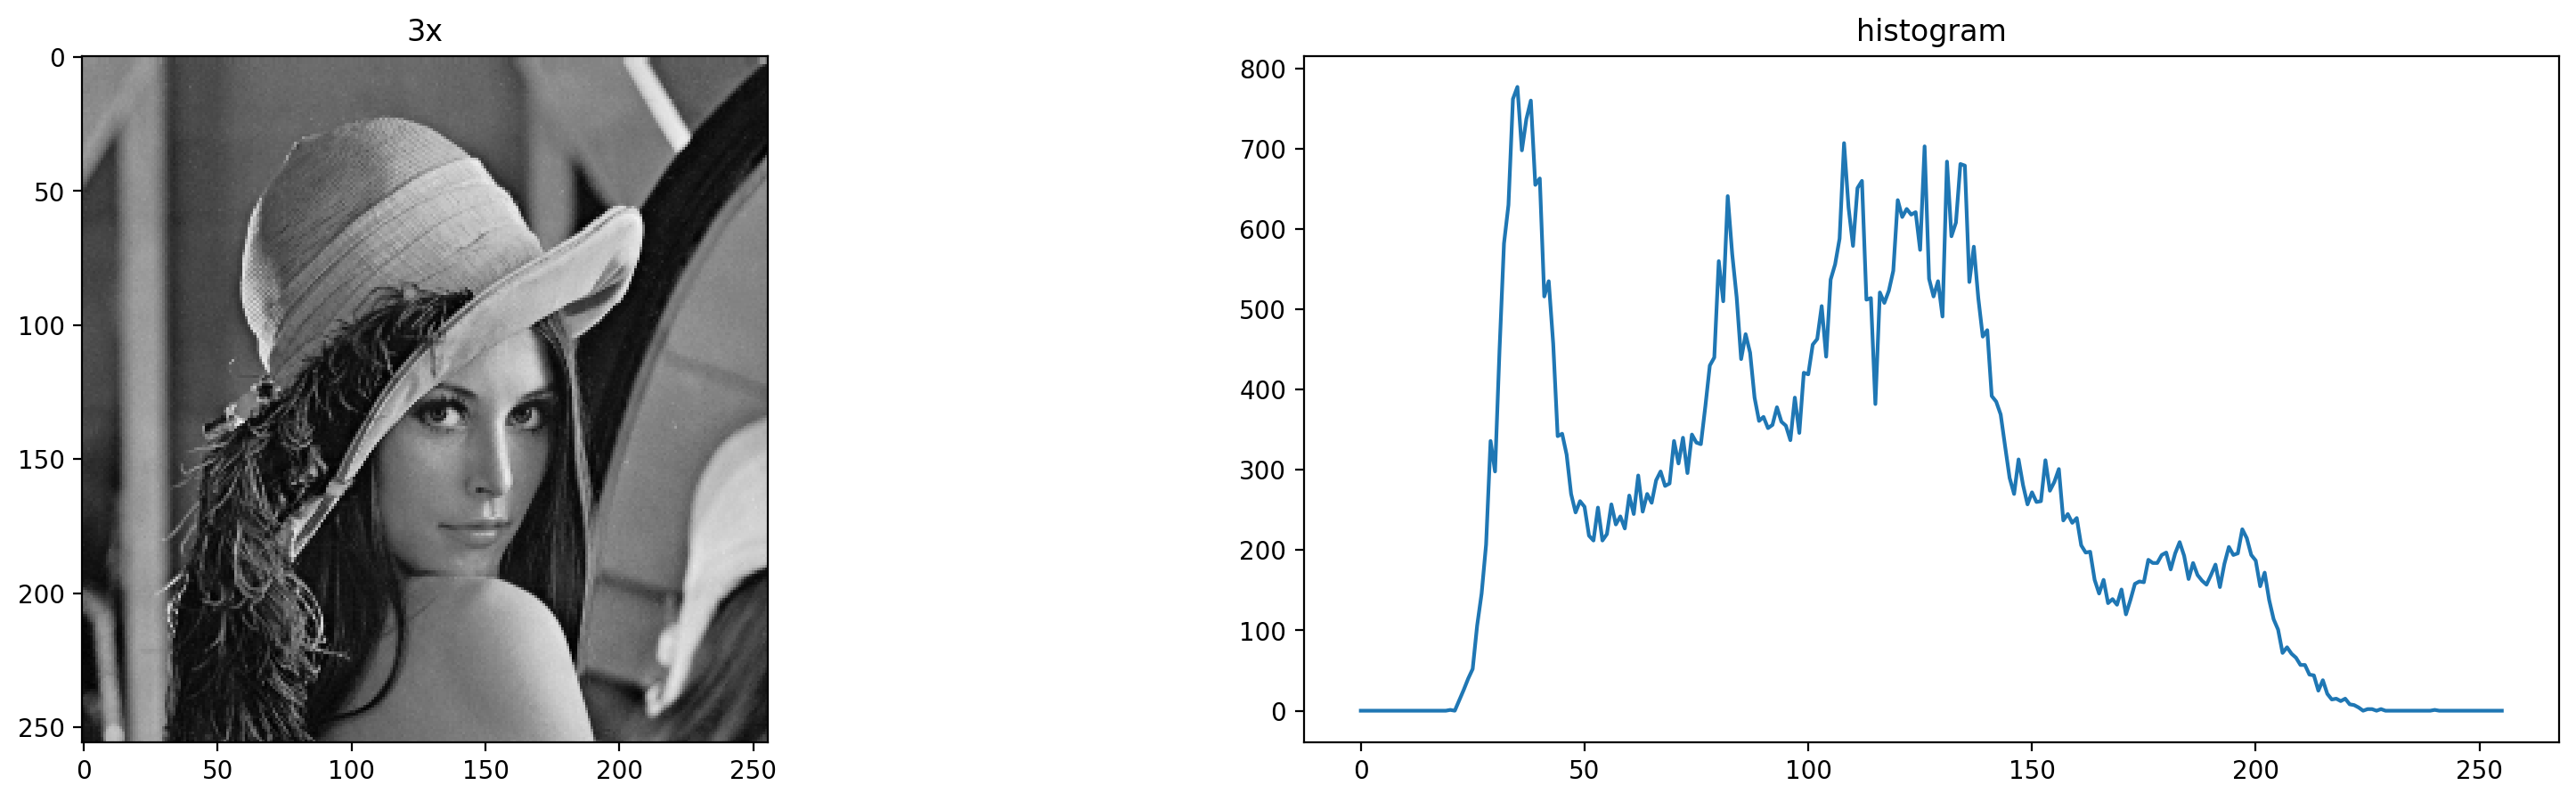

In [9]:
lena_15x = bicubic_interpolation(lena, 3, 3)
show_img_with_hist(lena_05x, "3x")

C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:25: RuntimeWarning: overflow encountered in scalar subtract
  return (image[x1, y1] - image[x2, y] - image[x, y2] + image[x, y]) / 4
C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:25: RuntimeWarning: overflow encountered in scalar add
  return (image[x1, y1] - image[x2, y] - image[x, y2] + image[x, y]) / 4
C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:14: RuntimeWarning: overflow encountered in scalar subtract
  return (image[x1, y] - image[x2, y]) / 2
C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:18: RuntimeWarning: overflow encountered in scalar subtract
  return (image[x, y1] - image[x, y2]) / 2


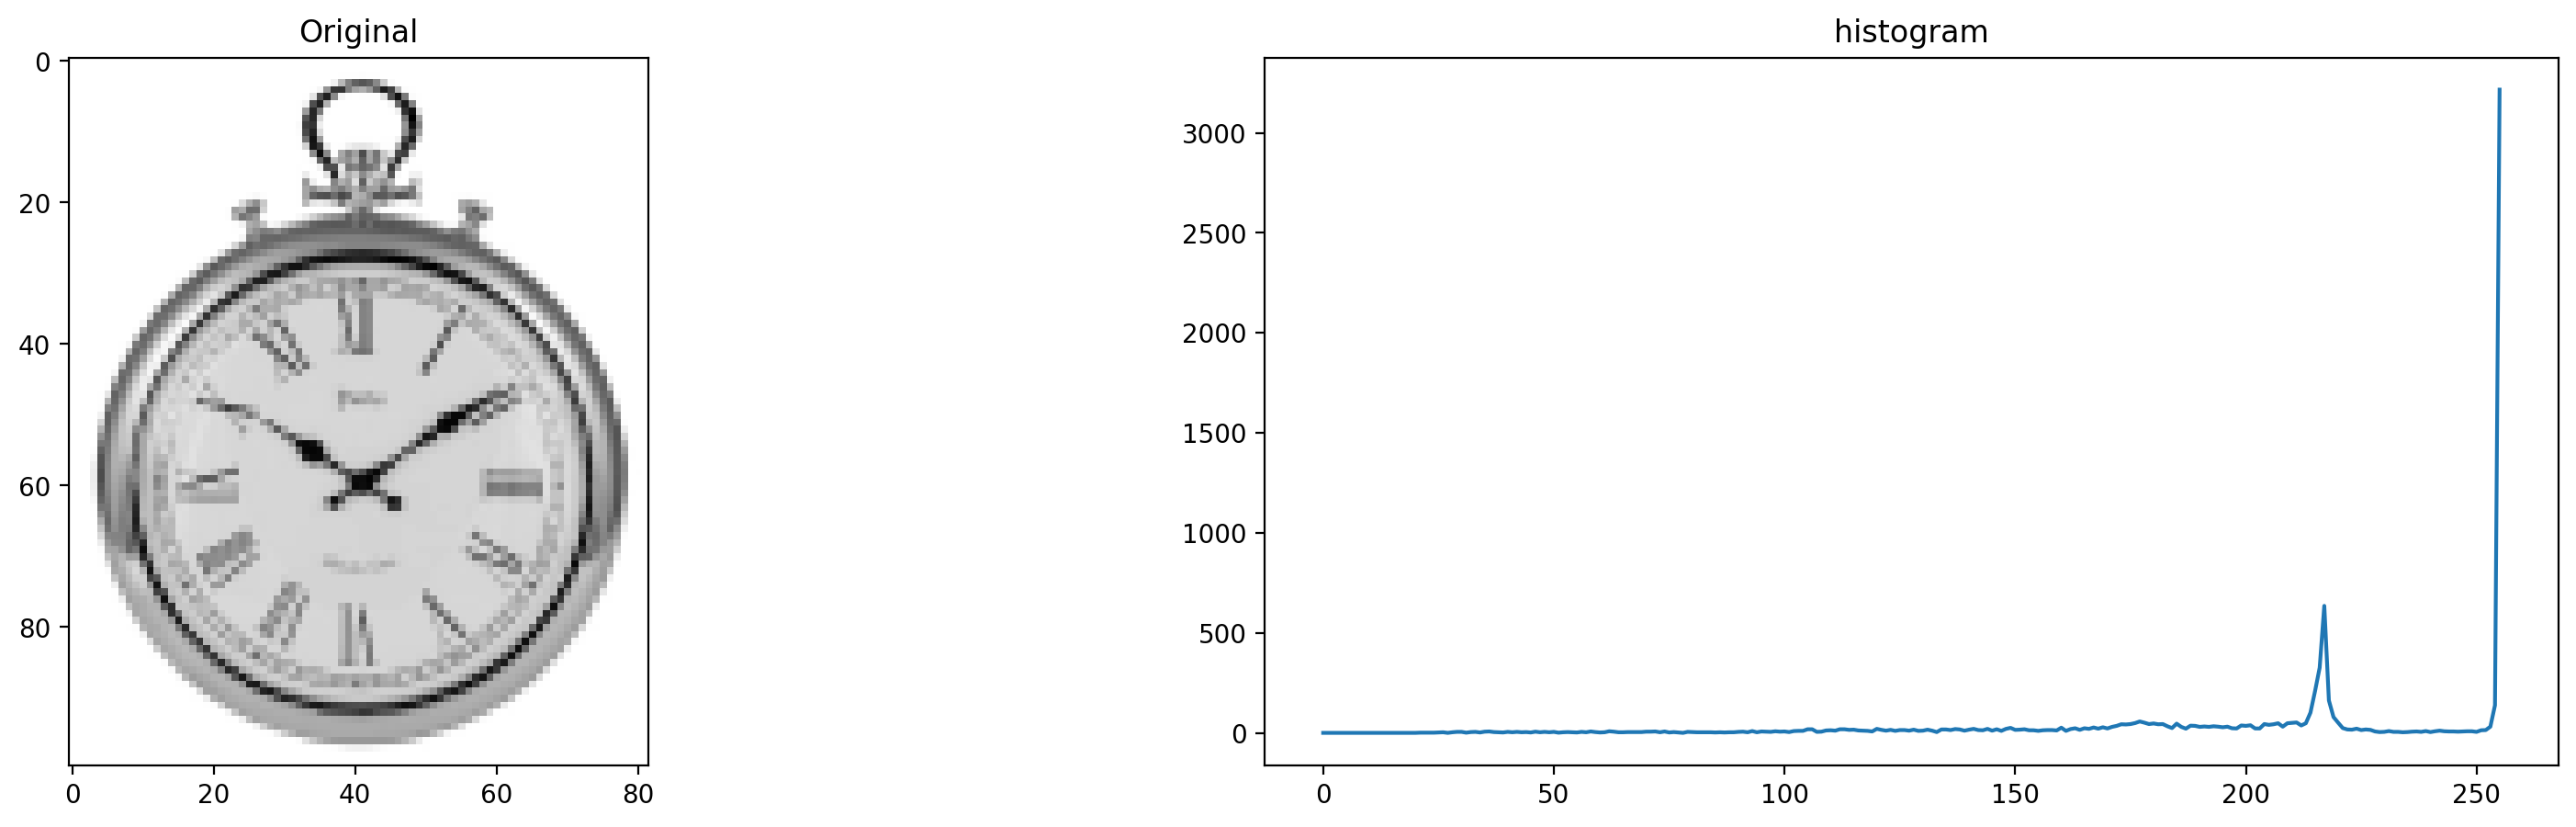

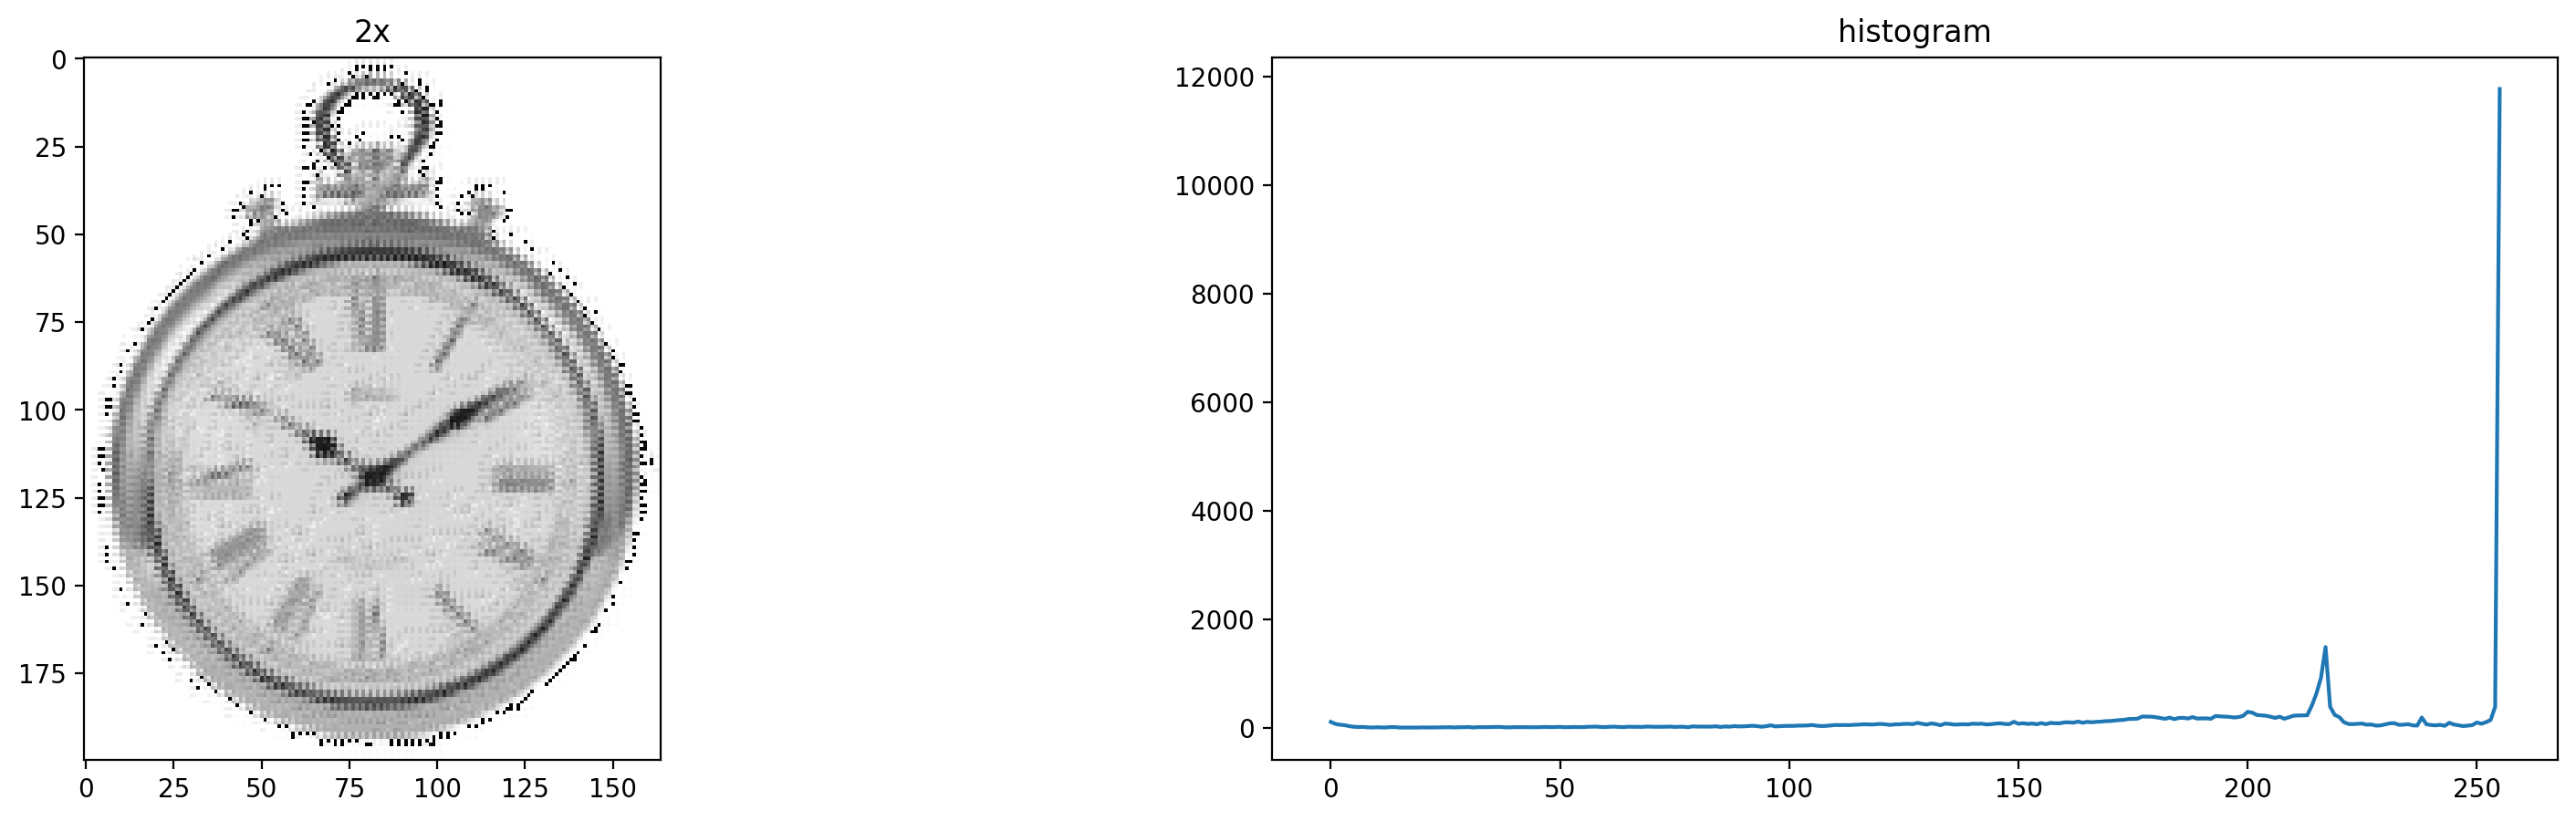

In [7]:
clock = cv2.imread("clock.bmp", cv2.IMREAD_GRAYSCALE)
show_img_with_hist(clock, "Original")
clock = bicubic_interpolation(clock, 2, 2)
show_img_with_hist(clock, "2x")

C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:14: RuntimeWarning: overflow encountered in scalar subtract
  return (image[x1, y] - image[x2, y]) / 2
C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:18: RuntimeWarning: overflow encountered in scalar subtract
  return (image[x, y1] - image[x, y2]) / 2
C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:25: RuntimeWarning: overflow encountered in scalar subtract
  return (image[x1, y1] - image[x2, y] - image[x, y2] + image[x, y]) / 4
C:\Users\Jakub\AppData\Local\Temp\ipykernel_12352\979908696.py:25: RuntimeWarning: overflow encountered in scalar add
  return (image[x1, y1] - image[x2, y] - image[x, y2] + image[x, y]) / 4


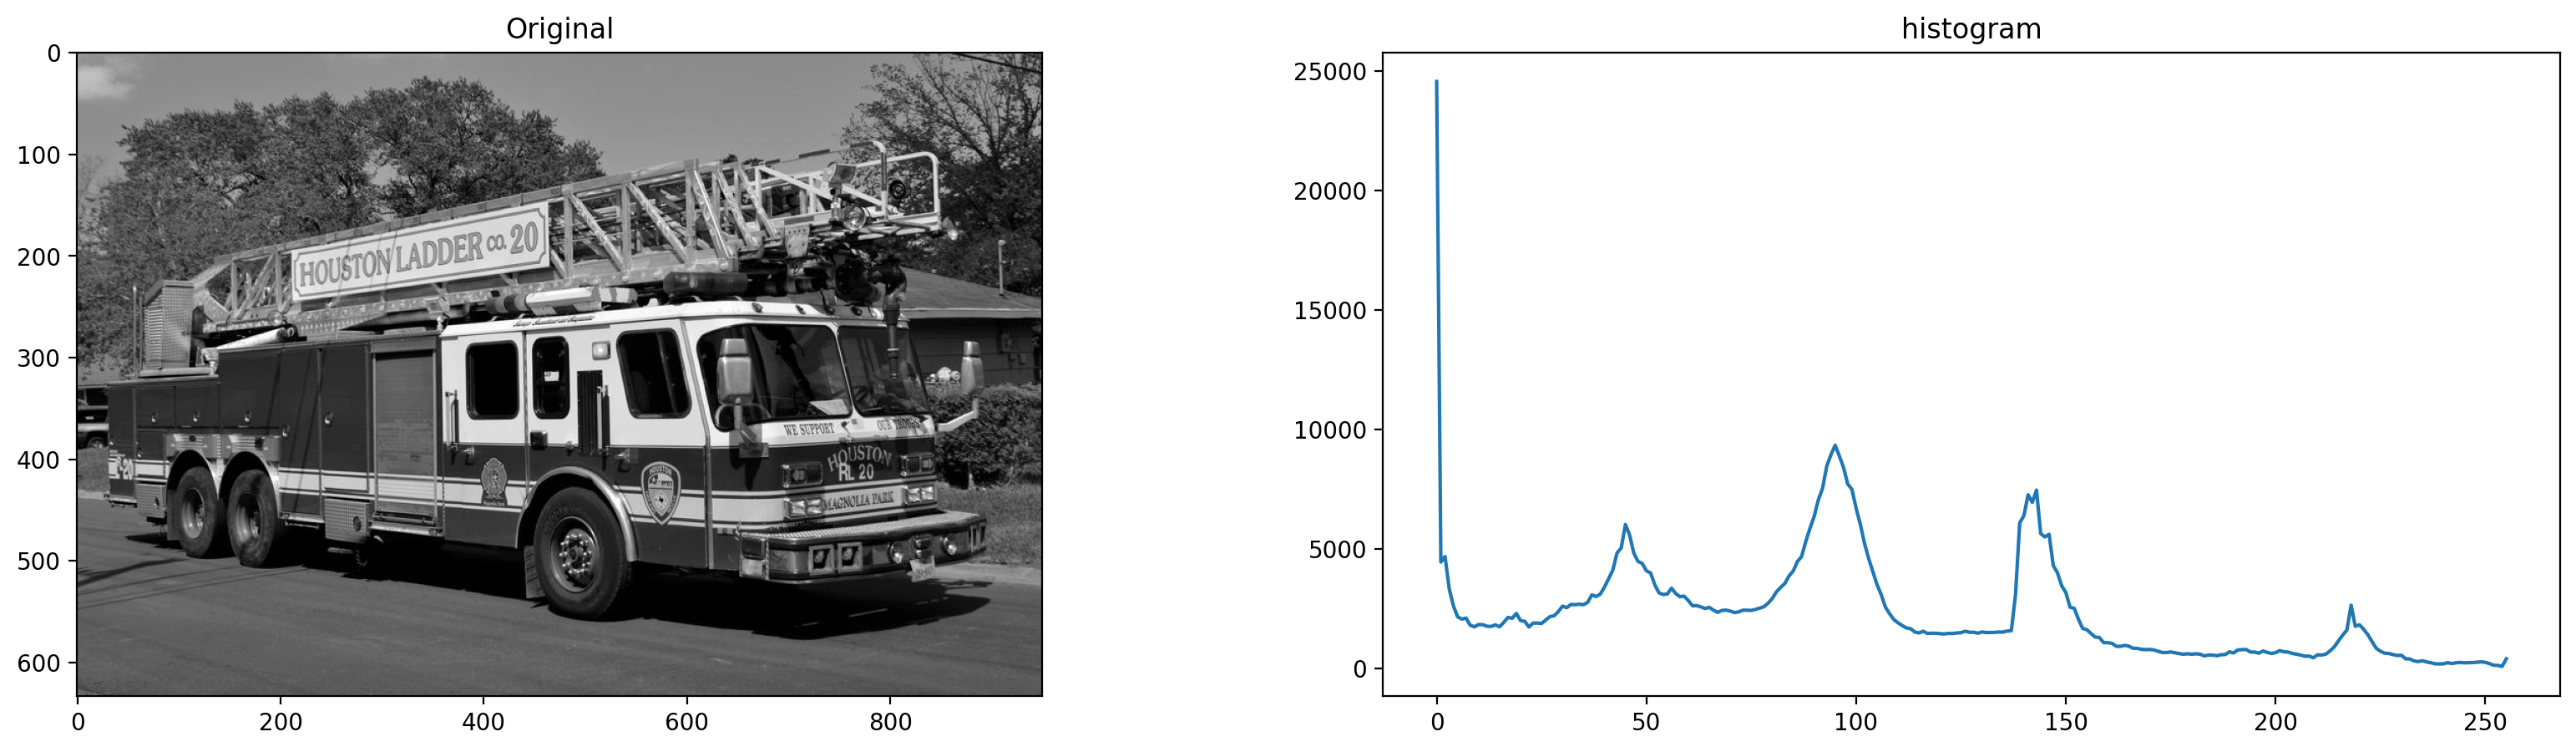

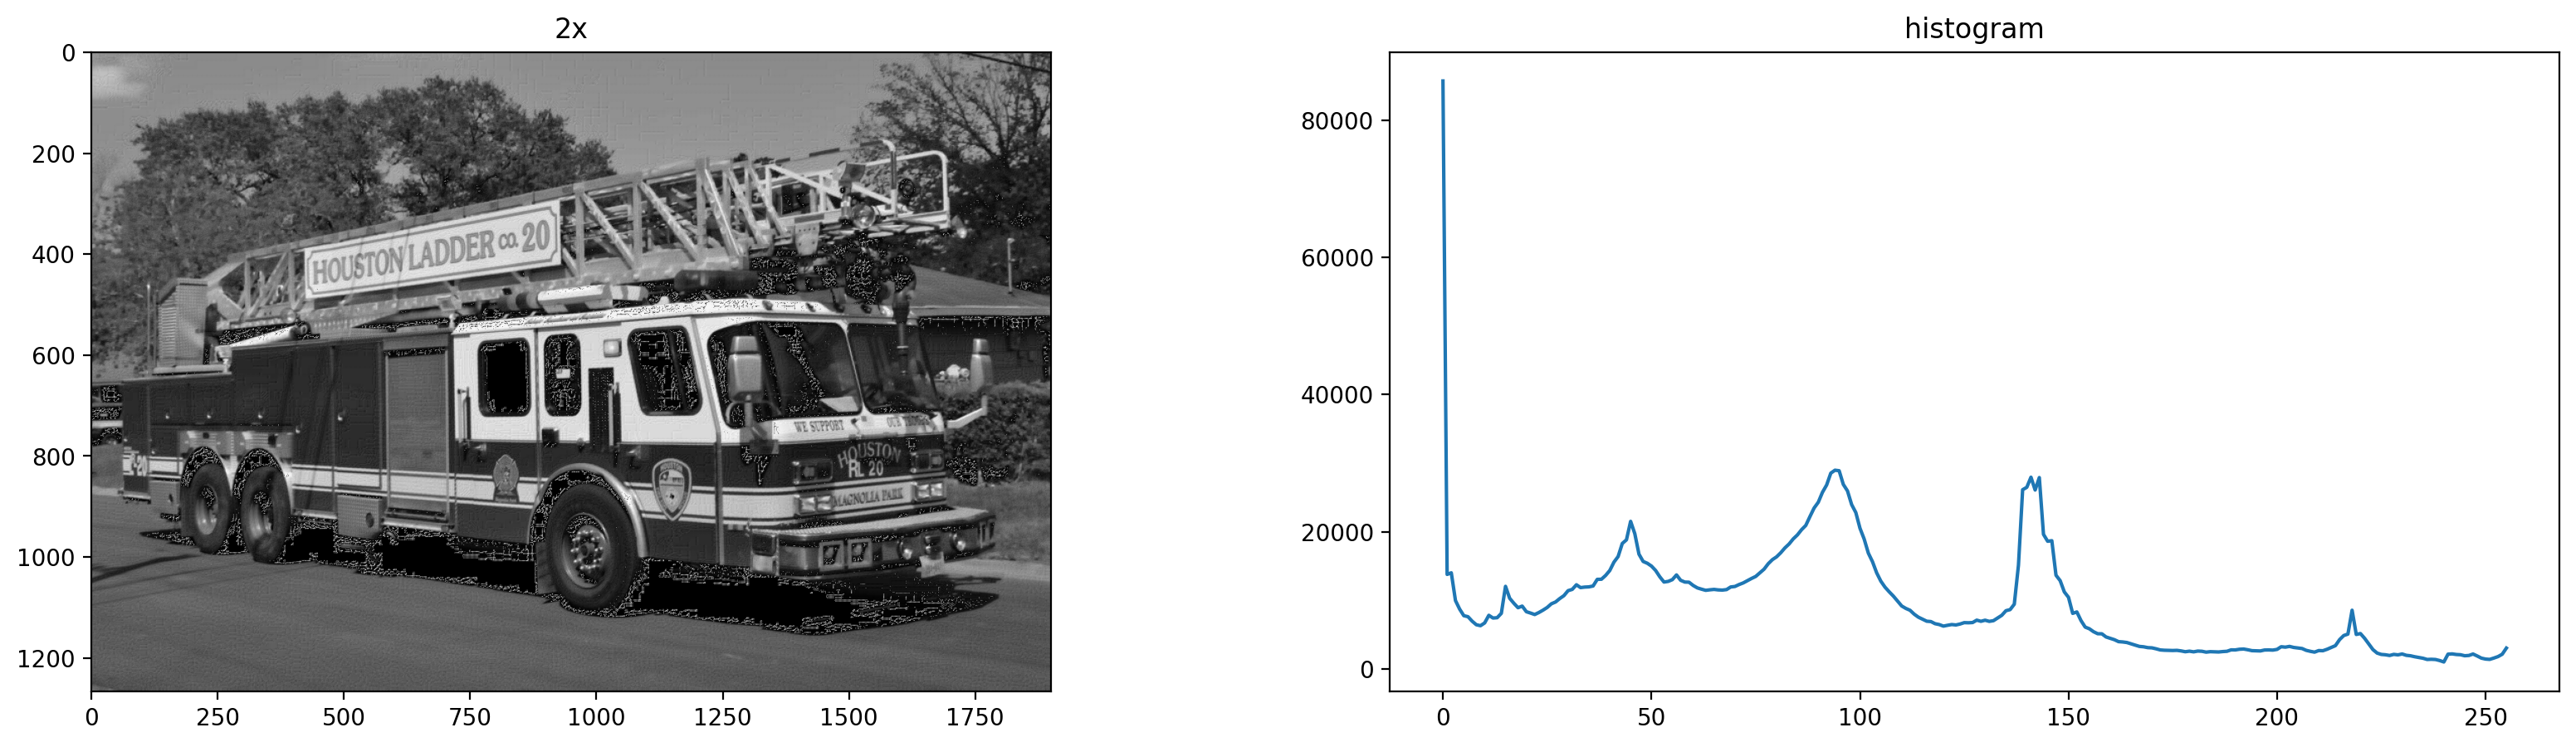

In [8]:
firetruck = cv2.imread("firetruck.jpg", cv2.IMREAD_GRAYSCALE)
show_img_with_hist(firetruck, "Original")
firetruck = bicubic_interpolation(firetruck, 2, 2)
show_img_with_hist(firetruck, "2x")